In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
from datetime import datetime

from sklearn.model_selection import (GridSearchCV, 
                                     TimeSeriesSplit,
                                     train_test_split)
from sklearn.preprocessing import (OrdinalEncoder, 
                                   OneHotEncoder)
from sklearn.linear_model import (LinearRegression, 
                                  RidgeCV, 
                                  LassoCV, 
                                  ElasticNetCV)
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

In [19]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,12,31)

In [20]:

data = pd.DataFrame()
data = data.ta.ticker('spy',start = start_date, end = end_date)

In [21]:
df = data.copy()

In [22]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-23 00:00:00-05:00,357.633467,358.934725,356.604112,356.944000,46201400,0.0,0
2020-12-24 00:00:00-05:00,357.439255,358.361804,356.827493,358.332672,26457900,0.0,0
2020-12-28 00:00:00-05:00,360.993419,361.818852,360.342805,361.411011,39000400,0.0,0
2020-12-29 00:00:00-05:00,363.003628,363.188138,360.109765,360.721558,53680500,0.0,0
2020-12-30 00:00:00-05:00,361.576094,362.314133,360.828364,361.236206,49455300,0.0,0


In [23]:
df = df[['Close']]
df.tail()

,Close
Date,
2020-12-23 00:00:00-05:00,356.944000
2020-12-24 00:00:00-05:00,358.332672
2020-12-28 00:00:00-05:00,361.411011
2020-12-29 00:00:00-05:00,360.721558
2020-12-30 00:00:00-05:00,361.236206


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2015-01-02 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


In [25]:
df.ta.macd(append=True)
df.tail()

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,
2020-12-23 00:00:00-05:00,356.944000,3.782510,-0.641183,4.423693
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606892,4.271970
2020-12-28 00:00:00-05:00,361.411011,3.776872,-0.396079,4.172951
2020-12-29 00:00:00-05:00,360.721558,3.766419,-0.325225,4.091644
2020-12-30 00:00:00-05:00,361.236206,3.756362,-0.268226,4.024588


In [26]:
window = 21
target_column = 'MACDh_12_26_9'
roll = df[target_column].rolling(window)
df['z-score-MACDh'] = (df[target_column] - roll.mean()) / roll.std()
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh
Date,,,,,
2015-01-02 00:00:00-05:00,177.463638,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-05:00,174.258652,NaN,NaN,NaN,NaN
2015-01-06 00:00:00-05:00,172.617401,NaN,NaN,NaN,NaN
2015-01-07 00:00:00-05:00,174.768356,NaN,NaN,NaN,NaN
2015-01-08 00:00:00-05:00,177.869644,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782510,-0.641183,4.423693,-1.358761
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606892,4.271970,-1.174522
2020-12-28 00:00:00-05:00,361.411011,3.776872,-0.396079,4.172951,-0.669623


In [27]:
df['Close'].pct_change(5).shift(-5)

Date
2015-01-02 00:00:00-05:00   -0.005744
2015-01-05 00:00:00-05:00    0.004611
2015-01-06 00:00:00-05:00    0.011310
2015-01-07 00:00:00-05:00   -0.007167
2015-01-08 00:00:00-05:00   -0.033414
                               ...   
2020-12-23 00:00:00-05:00         NaN
2020-12-24 00:00:00-05:00         NaN
2020-12-28 00:00:00-05:00         NaN
2020-12-29 00:00:00-05:00         NaN
2020-12-30 00:00:00-05:00         NaN
Name: Close, Length: 1510, dtype: float64

In [28]:
df['Profit-Loss'] = df['Close'].pct_change(5).shift(-5)
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,Profit-Loss
Date,,,,,,
2015-01-02 00:00:00-05:00,177.463638,NaN,NaN,NaN,NaN,-0.005744
2015-01-05 00:00:00-05:00,174.258652,NaN,NaN,NaN,NaN,0.004611
2015-01-06 00:00:00-05:00,172.617401,NaN,NaN,NaN,NaN,0.011310
2015-01-07 00:00:00-05:00,174.768356,NaN,NaN,NaN,NaN,-0.007167
2015-01-08 00:00:00-05:00,177.869644,NaN,NaN,NaN,NaN,-0.033414
...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782510,-0.641183,4.423693,-1.358761,NaN
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606892,4.271970,-1.174522,NaN
2020-12-28 00:00:00-05:00,361.411011,3.776872,-0.396079,4.172951,-0.669623,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2015-01-02 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          1510 non-null   float64
 1   MACD_12_26_9   1477 non-null   float64
 2   MACDh_12_26_9  1477 non-null   float64
 3   MACDs_12_26_9  1477 non-null   float64
 4   z-score-MACDh  1457 non-null   float64
 5   Profit-Loss    1505 non-null   float64
dtypes: float64(6)
memory usage: 82.6 KB


In [30]:
df.dropna(inplace=True)

In [31]:
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,Profit-Loss
Date,,,,,,
2015-03-20 00:00:00-04:00,182.577042,0.492658,0.048072,0.444586,0.336023,-0.022195
2015-03-23 00:00:00-04:00,182.221268,0.595780,0.120956,0.474825,0.582388,-0.008333
2015-03-24 00:00:00-04:00,181.197357,0.588105,0.090624,0.497481,0.603975,-0.011445
2015-03-25 00:00:00-04:00,178.542114,0.363576,-0.107124,0.470700,0.208922,-0.000292
2015-03-26 00:00:00-04:00,178.116898,0.149598,-0.256881,0.406479,-0.107782,0.005700
...,...,...,...,...,...,...
2020-12-16 00:00:00-05:00,357.943115,4.525214,-0.458619,4.983833,-1.338210,-0.002791
2020-12-17 00:00:00-05:00,359.944641,4.617565,-0.293015,4.910580,-1.068218,-0.004478
2020-12-18 00:00:00-05:00,358.507477,4.522652,-0.310342,4.832994,-1.051383,0.008099


In [32]:
my_features = ['MACD_12_26_9', 'MACDs_12_26_9','z-score-MACDh']
X = df[my_features]
y = df['Profit-Loss']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ## Linear Regression

In [36]:

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
m = reg.coef_
print("coef = ",m)
b = reg.intercept_
print("intercept = ",b)

coef =  [ 0.00385432 -0.00479301 -0.00211189]
intercept =  0.0037764576906361043


In [41]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [42]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.025700605012555
mean_squared_error =		 0.0005513347239580572
mean_absolute_error =		 0.015172607686261927
mean_absolute_percentage_error = 2.1184492990320294


Text(0, 0.5, 'Actual')

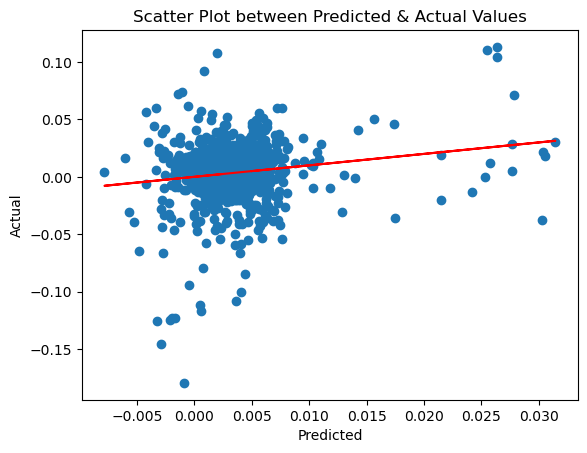

In [43]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [44]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 -0.00842955464879358
mean_squared_error =		 0.0005022661324882663
mean_absolute_error =		 0.014520483893693035
mean_absolute_percentage_error = 47306857790.81109


Text(0, 0.5, 'Actual')

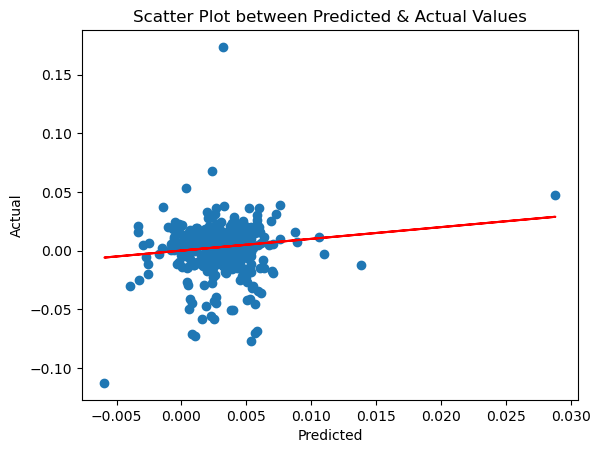

In [45]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Ridge Regression

In [46]:
alphas = np.logspace(-3, 3, num=100)

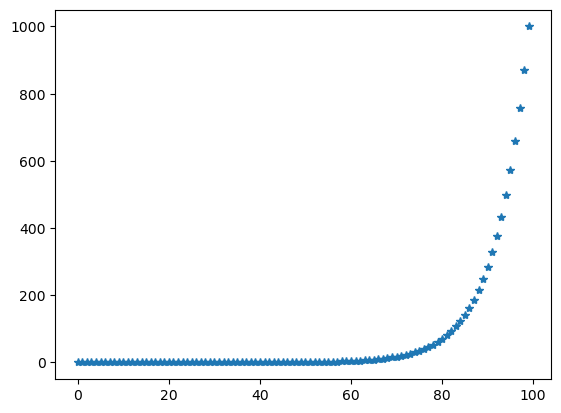

In [47]:
plt.plot(alphas, '*')

In [48]:
tscv = TimeSeriesSplit(n_splits = 5)
ridge = RidgeCV(alphas=alphas, cv=tscv)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [51]:
ridge.alpha_


1000.0

In [50]:
ridge.coef_

array([ 0.00078184, -0.00135288, -0.00042107])

In [52]:
ridge.intercept_

0.0038204625270319616

In [53]:

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [54]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.013094797993434604
mean_squared_error =		 0.0005584680745163267
mean_absolute_error =		 0.015028197709291457
mean_absolute_percentage_error = 1.892715124051214


Text(0, 0.5, 'Actual')

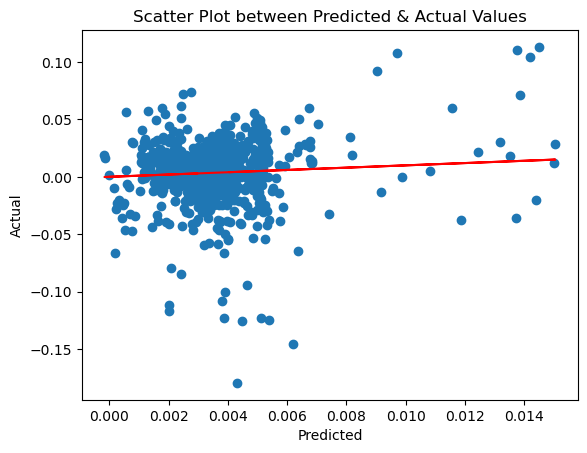

In [55]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [56]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 -0.0039011254005854035
mean_squared_error =		 0.0005000106684013014
mean_absolute_error =		 0.014494797163039558
mean_absolute_percentage_error = 41723667251.62375


Text(0, 0.5, 'Actual')

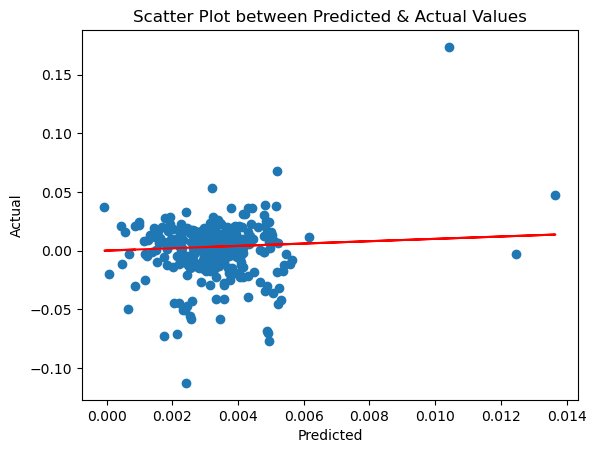

In [57]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Losso regression

In [58]:
tscv = TimeSeriesSplit(n_splits = 5)
lasso = LassoCV(n_alphas=100, cv=tscv)

In [59]:
lasso.fit(X_train, y_train)

LassoCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None))

In [60]:
lasso.alpha_

0.005400228503948883

In [61]:
lasso.coef_

array([-0.00000000e+00, -6.09503456e-19, -0.00000000e+00])

In [62]:
lasso.intercept_

0.0034779656482360802

In [64]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [65]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 2.220446049250313e-16
mean_squared_error =		 0.0005658781343748672
mean_absolute_error =		 0.015069541227051933
mean_absolute_percentage_error = 1.880519296593139


Text(0, 0.5, 'Actual')

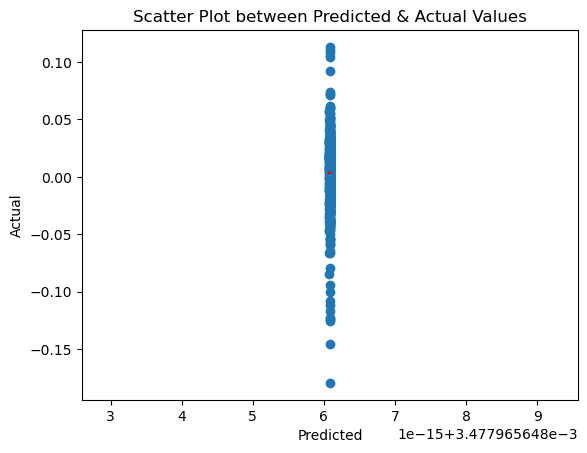

In [66]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [67]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 -0.02162827028882841
mean_squared_error =		 0.0005088399856917668
mean_absolute_error =		 0.014525436682452925
mean_absolute_percentage_error = 43149765284.101715


Text(0, 0.5, 'Actual')

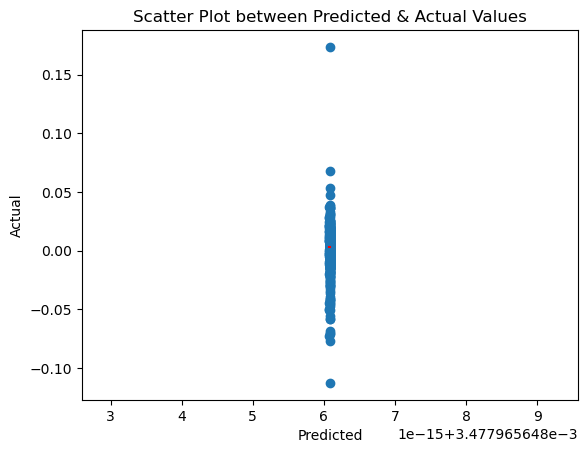

In [68]:
# Scatter Plot between Predicted & Actual Values
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')